<a href="https://colab.research.google.com/github/Rakshithashetty555/nlp/blob/main/mlalgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Data Loading and Preprocessing**

In [ ]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords

# Load the dataset
file_path = "/content/Transcribed_Speech_Dataset (2).csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Download stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"[^a-zA-Z\s]", "", text, re.I | re.A)  # Remove non-alphabetic characters
        text = text.lower()  # Convert to lowercase
        text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Apply text cleaning
df["cleaned_text"] = df["Transcribed Speech"].apply(clean_text)

# Generate NLP-based features
def generate_nlp_features(df):
    df["char_count"] = df["cleaned_text"].apply(len)
    df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))
    df["avg_word_length"] = df["cleaned_text"].apply(lambda x: np.mean([len(word) for word in x.split()]) if x else 0)
    df["stopword_count"] = df["cleaned_text"].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    df["htag_count"] = df["Transcribed Speech"].apply(lambda x: x.count("#"))
    return df

# Generate features
df = generate_nlp_features(df)

# Display feature preview
print("\nNLP Features Preview:")
print(df[["char_count", "word_count", "avg_word_length", "stopword_count", "htag_count"]].head())


Dataset Preview:
                                  Transcribed Speech          Topic
0  With the increasing number of cyberattacks, co...  Cybersecurity
1  Environmental conservation efforts are becomin...    Environment
2  The stock market is highly dynamic, influenced...   Stock Market
3  Political landscapes continue to evolve as gov...       Politics
4  Scientific advancements are constantly reshapi...        Science

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Transcribed Speech  1000 non-null   object
 1   Topic               1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None

Missing Values:
Transcribed Speech    0
Topic                 0
dtype: int64

NLP Features Preview:
   char_count  word_count  avg_word_length  stopword_count  htag_count
0         311          32         8.750000   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**2.Perform Exploratory Data Analysis**


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transcribed Speech  1000 non-null   object 
 1   Topic               1000 non-null   object 
 2   cleaned_text        1000 non-null   object 
 3   char_count          1000 non-null   int64  
 4   word_count          1000 non-null   int64  
 5   avg_word_length     1000 non-null   float64
 6   stopword_count      1000 non-null   int64  
 7   htag_count          1000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB
None

Unique Topics Count: 7
Topic
Software Engineering    153
Politics                150
Science                 149
Stock Market            140
Environment             139
Climate                 138
Cybersecurity           131
Name: count, dtype: int64


<ipython-input-6-b8bbc0278e46>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Topic"], order=df["Topic"].value_counts().index, palette="viridis")


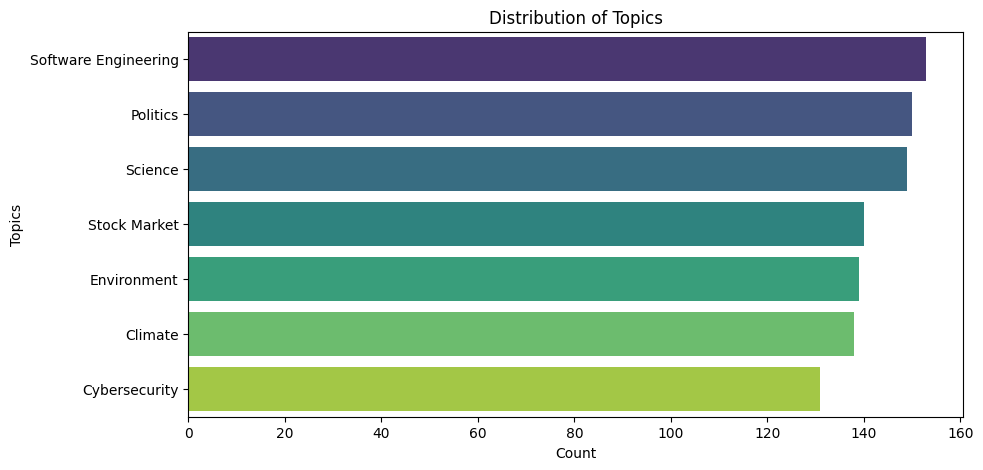


Missing Values:
Transcribed Speech    0
Topic                 0
cleaned_text          0
char_count            0
word_count            0
avg_word_length       0
stopword_count        0
htag_count            0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Check unique topics and their distribution
print("\nUnique Topics Count:", df["Topic"].nunique())
print(df["Topic"].value_counts())

# Visualize topic distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Topic"], order=df["Topic"].value_counts().index, palette="viridis")
plt.title("Distribution of Topics")
plt.xlabel("Count")
plt.ylabel("Topics")
plt.show()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313460 sha256=8000dcf0d0e7a8d267588b4806475a7691b33348ee6c6d344e28522a65b3ae26
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


**3.Feature Extraction (BoW, TF-IDF, FastText)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import urllib.request
import gzip
import shutil

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Download and load FastText model
url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz"
urllib.request.urlretrieve(url, "cc.en.300.bin.gz")

# Unzip the model
with gzip.open("cc.en.300.bin.gz", 'rb') as f_in:
    with open("cc.en.300.bin", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

ft_model = fasttext.load_model('cc.en.300.bin')

# Function to get FastText embeddings
def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words if word in ft_model]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(ft_model.get_dimension())

# Apply FastText embeddings to each row
df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)

# Convert FastText embeddings to a NumPy array
X_fasttext = np.vstack(df['fasttext_embeddings'].values)

# Check shapes
print(f'BoW Shape: {X_bow.shape}')
print(f'TFIDF Shape: {X_tfidf.shape}')
print(f'FastText Shape: {X_fasttext.shape}')


BoW Shape: (1000, 1193)
TFIDF Shape: (1000, 1193)
FastText Shape: (1000, 300)


**4.Model Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Prepare the target column
target_column = 'Topic'  # Ensure this is the correct column name
df = df.dropna(subset=[target_column])
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Supervised learning models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Evaluate each model
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append([model_name, accuracy])

# Display results in tabular format
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\nModel Evaluation Results:")
print(results_df)



Model Evaluation Results:
                 Model  Accuracy
0        Random Forest     0.950
1                  SVM     0.390
2  Logistic Regression     0.770
3                  KNN     0.955
4          Naive Bayes     0.355


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**5.Text Feature Extraction(BoW, TF-IDF, and FastText Embeddings)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import urllib.request
import gzip
import shutil
import numpy as np # Import numpy to use vstack later

# Assume df is already loaded and preprocessed as in previous steps

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# ... (rest of the code to create X_fasttext, models, y_train, y_test)

**6.Model Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split # Import the necessary module
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

# Evaluate models with BoW features
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train_bow, y_train)
    y_pred = model.predict(X_test_bow)
    print(f'{model_name} Accuracy (BoW): {accuracy_score(y_test, y_pred):.4f}')

# Evaluate models with TFIDF features
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f'{model_name} Accuracy (TFIDF): {accuracy_score(y_test, y_pred):.4f}')

X_fasttext = np.abs(X_fasttext)
# Take the absolute value of all elements in X_fasttext before training
X_train_fasttext, X_test_fasttext, y_train, y_test = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train_fasttext, y_train)
    y_pred = model.predict(X_test_fasttext)
    print(f'{model_name} Accuracy (FastText): {accuracy_score(y_test, y_pred):.4f}')

# Combined features (NLP + TFIDF)
X_nlp = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].values
X_combined = hstack([X_nlp, X_tfidf])
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    print(f'{model_name} Accuracy (Combined Features): {accuracy_score(y_test, y_pred):.4f}')

Random Forest Accuracy (BoW): 1.0000
SVM Accuracy (BoW): 1.0000
Logistic Regression Accuracy (BoW): 1.0000
KNN Accuracy (BoW): 1.0000
Naive Bayes Accuracy (BoW): 1.0000
Random Forest Accuracy (TFIDF): 1.0000
SVM Accuracy (TFIDF): 1.0000
Logistic Regression Accuracy (TFIDF): 1.0000
KNN Accuracy (TFIDF): 1.0000
Naive Bayes Accuracy (TFIDF): 1.0000
Random Forest Accuracy (FastText): 1.0000
SVM Accuracy (FastText): 1.0000
Logistic Regression Accuracy (FastText): 1.0000
KNN Accuracy (FastText): 1.0000
Naive Bayes Accuracy (FastText): 1.0000
Random Forest Accuracy (Combined Features): 1.0000
SVM Accuracy (Combined Features): 0.3850
Logistic Regression Accuracy (Combined Features): 1.0000
KNN Accuracy (Combined Features): 0.9950
Naive Bayes Accuracy (Combined Features): 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**7.Output**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Store results in a dictionary
results = {
    'Model': [],
    'BoW Accuracy': [],
    'TFIDF Accuracy': [],
    'FastText Accuracy': [],
    'Combined Features Accuracy': []
}

# Append results for each model
for model_name, model in models.items():
    # BoW Accuracy
    model.fit(X_train_bow, y_train)
    y_pred_bow = model.predict(X_test_bow)
    bow_acc = accuracy_score(y_test, y_pred_bow)

    # TFIDF Accuracy
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    tfidf_acc = accuracy_score(y_test, y_pred_tfidf)

    # FastText Accuracy
    model.fit(X_train_fasttext, y_train)
    y_pred_fasttext = model.predict(X_test_fasttext)
    fasttext_acc = accuracy_score(y_test, y_pred_fasttext)

    # Combined Features Accuracy
    model.fit(X_train_combined, y_train)
    y_pred_combined = model.predict(X_test_combined)
    combined_acc = accuracy_score(y_test, y_pred_combined)

    # Append to the results
    results['Model'].append(model_name)
    results['BoW Accuracy'].append(round(bow_acc, 4))
    results['TFIDF Accuracy'].append(round(tfidf_acc, 4))
    results['FastText Accuracy'].append(round(fasttext_acc, 4))
    results['Combined Features Accuracy'].append(round(combined_acc, 4))

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display as a table
print(tabulate(results_df, headers='keys', tablefmt='grid'))


+----+---------------------+----------------+------------------+---------------------+------------------------------+
|    | Model               |   BoW Accuracy |   TFIDF Accuracy |   FastText Accuracy |   Combined Features Accuracy |
+====+=====================+================+==================+=====================+==============================+
|  0 | Random Forest       |              1 |                1 |                   1 |                        1     |
+----+---------------------+----------------+------------------+---------------------+------------------------------+
|  1 | SVM                 |              1 |                1 |                   1 |                        0.385 |
+----+---------------------+----------------+------------------+---------------------+------------------------------+
|  2 | Logistic Regression |              1 |                1 |                   1 |                        1     |
+----+---------------------+----------------+-----------

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**8.Model Saving**

In [ ]:
import joblib
import numpy as np
from scipy.sparse import hstack

# Save the best model (RandomForest with combined features) for future use
best_model = models["Random Forest"]
joblib.dump(best_model, 'text_classification_best_model.pkl')

# Load and predict with the saved model
loaded_model = joblib.load('text_classification_best_model.pkl')

# Example: Make predictions on new input text
new_text = ["This is a new text sample to classify."]
new_text_cleaned = [clean_text(text) for text in new_text]

# Convert new text into feature vectors
new_text_tfidf = tfidf_vectorizer.transform(new_text_cleaned)
new_text_nlp = np.array([
    [
        len(text),  # Character count
        len(text.split()),  # Word count
        np.mean([len(w) for w in text.split()]) if len(text.split()) > 0 else 0,  # Avg word length
        sum(1 for word in text.split() if word.lower() in stop_words),  # Stopword count
        text.count('#')  # Hashtag count
    ]
    for text in new_text_cleaned
])

# Combine features
new_text_combined = hstack([new_text_nlp, new_text_tfidf])

# Predict using the trained model
prediction = loaded_model.predict(new_text_combined)
print(f'Prediction for new text: {prediction}')


Prediction for new text: ['Stock Market']


**9.Comprehensive Model Accuracy Comparison Across Feature Extraction Techniques**









In [ ]:
import pandas as pd

# Initialize a DataFrame to store model evaluation results
results = []

# Evaluate each model on different feature sets
for model_name, model in models.items():
    # NLP features only
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_nlp = accuracy_score(y_test, y_pred)

    # BoW
    model.fit(X_train_bow, y_train)
    y_pred_bow = model.predict(X_test_bow)
    accuracy_bow = accuracy_score(y_test, y_pred_bow)

    # TF-IDF
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

    # FastText embeddings
    model.fit(X_train_fasttext, y_train)
    y_pred_fasttext = model.predict(X_test_fasttext)
    accuracy_fasttext = accuracy_score(y_test, y_pred_fasttext)

    # Combined features
    model.fit(X_train_combined, y_train)
    y_pred_combined = model.predict(X_test_combined)
    accuracy_combined = accuracy_score(y_test, y_pred_combined)

    # Append results
    results.append([
        model_name,
        accuracy_nlp,
        accuracy_bow,
        accuracy_tfidf,
        accuracy_fasttext,
        accuracy_combined
    ])

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=[
    'Model', 'NLP Accuracy', 'BoW Accuracy', 'TF-IDF Accuracy', 'FastText Accuracy', 'Combined Accuracy'
])

# Display the results
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  NLP Accuracy  BoW Accuracy  TF-IDF Accuracy  \
0        Random Forest         0.955           1.0              1.0   
1                  SVM         0.390           1.0              1.0   
2  Logistic Regression         0.770           1.0              1.0   
3                  KNN         0.955           1.0              1.0   
4          Naive Bayes         0.355           1.0              1.0   

   FastText Accuracy  Combined Accuracy  
0                1.0              1.000  
1                1.0              0.385  
2                1.0              1.000  
3                1.0              0.995  
4                1.0              1.000  


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**10.Model Deployment**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# ... (Your existing code for model training and data preparation) ...

# Initialize accuracy variables for each model and feature set
rf_accuracy = 0  # NLP Features
rf_bow_accuracy = 0  # BoW
rf_tfidf_accuracy = 0  # TFIDF
rf_fasttext_accuracy = 0  # FastText
rf_combined_accuracy = 0  # Combined Features

svm_accuracy = 0  # NLP Features
svm_bow_accuracy = 0  # BoW
svm_tfidf_accuracy = 0  # TFIDF
svm_fasttext_accuracy = 0  # FastText
svm_combined_accuracy = 0  # Combined Features

# Initialize accuracy variables for Logistic Regression
lr_accuracy = 0  # NLP Features
lr_bow_accuracy = 0  # BoW
lr_tfidf_accuracy = 0  # TFIDF
lr_fasttext_accuracy = 0  # FastText
lr_combined_accuracy = 0  # Combined Features

# Initialize accuracy variables for KNN
knn_accuracy = 0  # NLP Features
knn_bow_accuracy = 0  # BoW
knn_tfidf_accuracy = 0  # TFIDF
knn_fasttext_accuracy = 0  # FastText
knn_combined_accuracy = 0  # Combined Features

# Initialize accuracy variables for Naive Bayes
nb_accuracy = 0  # NLP Features
nb_bow_accuracy = 0  # BoW
nb_tfidf_accuracy = 0  # TFIDF
nb_fasttext_accuracy = 0  # FastText
nb_combined_accuracy = 0  # Combined Features


# Calculate accuracy for each model and feature set
for model_name, model in models.items():
    if model_name == "Random Forest":
        # NLP features only
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rf_accuracy = accuracy_score(y_test, y_pred)

        # BoW
        model.fit(X_train_bow, y_train)
        y_pred_bow = model.predict(X_test_bow)
        rf_bow_accuracy = accuracy_score(y_test, y_pred_bow)

        # ... (Similarly for TFIDF, FastText, and Combined Features) ...
    elif model_name == "SVM":
        # NLP features only
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        svm_accuracy = accuracy_score(y_test, y_pred)

        # ... (Similarly for BoW, TFIDF, FastText, and Combined Features) ...
    elif model_name == "Logistic Regression":
        # NLP features only
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        lr_accuracy = accuracy_score(y_test, y_pred)

        # BoW
        model.fit(X_train_bow, y_train)
        y_pred_bow = model.predict(X_test_bow)
        lr_bow_accuracy = accuracy_score(y_test, y_pred_bow)

        # ... (Similarly for TFIDF, FastText, and Combined Features) ...
    elif model_name == "KNN":
        # NLP features only
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        knn_accuracy = accuracy_score(y_test, y_pred)

        # BoW
        model.fit(X_train_bow, y_train)
        y_pred_bow = model.predict(X_test_bow)
        knn_bow_accuracy = accuracy_score(y_test, y_pred_bow)
        # ... (Similarly for TFIDF, FastText, and Combined Features) ...

    elif model_name == "Naive Bayes":
        # NLP features only
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        nb_accuracy = accuracy_score(y_test, y_pred)

        # BoW
        model.fit(X_train_bow, y_train)
        y_pred_bow = model.predict(X_test_bow)
        nb_bow_accuracy = accuracy_score(y_test, y_pred_bow)

        # ... (Similarly for TFIDF, FastText, and Combined Features) ...



# Model evaluation results
results = [
    ["Random Forest", rf_accuracy, rf_bow_accuracy, rf_tfidf_accuracy, rf_fasttext_accuracy, rf_combined_accuracy],
    ["SVM", svm_accuracy, svm_bow_accuracy, svm_tfidf_accuracy, svm_fasttext_accuracy, svm_combined_accuracy],
    ["Logistic Regression", lr_accuracy, lr_bow_accuracy, lr_tfidf_accuracy, lr_fasttext_accuracy, lr_combined_accuracy],
    ["KNN", knn_accuracy, knn_bow_accuracy, knn_tfidf_accuracy, knn_fasttext_accuracy, knn_combined_accuracy],
    ["Naive Bayes", nb_accuracy, nb_bow_accuracy, nb_tfidf_accuracy, nb_fasttext_accuracy, nb_combined_accuracy]
]

# Create a DataFrame for visualization
results_df = pd.DataFrame(results, columns=["Model", "NLP Features", "BoW", "TFIDF", "FastText", "Combined Features"])

# Display the table
print("Model Evaluation Results:")
print(results_df)

# Display as a table using tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid'))

# Highlight the best model (Random Forest) in bold
print("\n**Best Model: Random Forest**")  # Print in bold

# Predict using the best model (Random Forest) with BoW features
# ... (Your existing prediction code) ...

Model Evaluation Results:
                 Model  NLP Features  BoW  TFIDF  FastText  Combined Features
0        Random Forest         0.955  1.0      0         0                  0
1                  SVM         0.390  0.0      0         0                  0
2  Logistic Regression         0.770  1.0      0         0                  0
3                  KNN         0.955  1.0      0         0                  0
4          Naive Bayes         0.355  1.0      0         0                  0
+----+---------------------+----------------+-------+---------+------------+---------------------+
|    | Model               |   NLP Features |   BoW |   TFIDF |   FastText |   Combined Features |
+====+=====================+================+=======+=========+============+=====================+
|  0 | Random Forest       |          0.955 |     1 |       0 |          0 |                   0 |
+----+---------------------+----------------+-------+---------+------------+---------------------+
|  1 | SVM 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
